In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Code import Simple_Monte_Carlo as mc
import pySCATMECH as scatmech
from pySCATMECH.fresnel import *

### Test Prob distance 

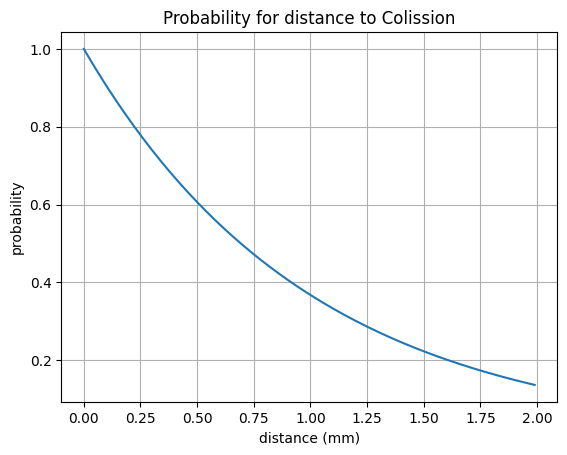

In [2]:
d = np.arange(0.0, 2.0, 0.01)
y = mc.ProbDist(d,1)

#fig, ax = plt.subplots()
plt.plot(d, y)

plt.xlabel('distance (mm)')
plt.ylabel('probability')
plt.title('Probability for distance to Colission')
plt.grid()


plt.show()

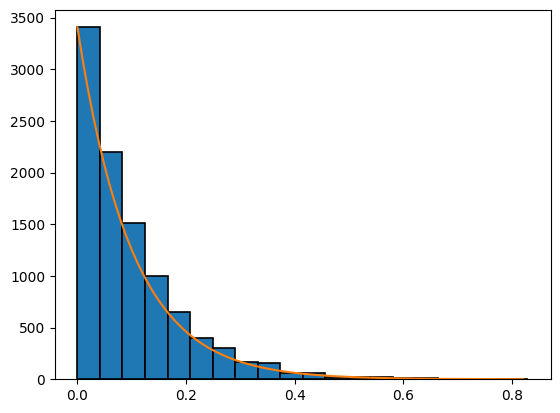

In [3]:
beta = 0.1;
xRand = np.random.rand(10000);
xSamples = mc.ExpSample(xRand,beta)
out=plt.hist(xSamples,bins=20, edgecolor='black', linewidth=1.2)

d = np.arange(0.0, np.max(xSamples), 0.01)
y = mc.ProbDist(d,beta)
plt.plot(d,out[0][0]*beta*y)

### Test rand num gen

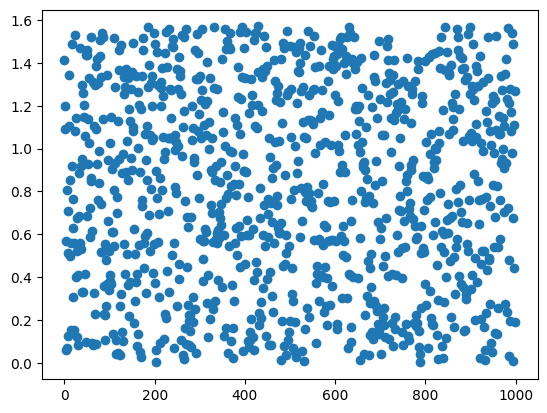

In [4]:
[thetas, phis] = mc.IsotropicPhaseFunction(1000)
plt.scatter(np.arange(0,len(thetas),1),thetas)

### Test Matrix Utility

In [5]:
[s,p,k] = mc.CreateSP( [0,0,1] , mc.normalize([0,0,1]))
[s,p,k]

[array([ 1.,  0., -0.]), array([-0.,  1.,  0.]), array([0., 0., 1.])]

In [6]:
u = [0,0,1]
v = mc.normalize([0,0.5,1])
RotM = mc.RotationMatrix(u,v)
RotM

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.89442719,  0.4472136 ],
       [ 0.        , -0.4472136 ,  0.89442719]])

In [7]:
up = np.dot(RotM,u)
up

array([0.        , 0.4472136 , 0.89442719])

In [9]:
mc.KScatter(np.array([1,0,0]),45*mc.deg, 90*mc.deg)

array([ 7.07106781e-01,  7.07106781e-01, -2.51206059e-33])

In [6]:
mc.TIRCheck(1.5,1.0, mc.normalize([0,0,1]) , mc.normalize([0,.9,1])  )

True

In [9]:
np.arcsin(1/1.5)/deg

41.810314895778596

### Test Ray/Material

In [2]:
inputRay = mc.Ray( mc.KVector(0,0), np.array([0,0,0]), 0.5)
inputRay.k

array([0., 0., 1.])

In [3]:
inputRay.OPLCumulative()

0

In [5]:
mat = mc.Material(1.5+ 0.0000023*1j, 0.001)

In [7]:
mat.k

2.3e-06

### Test PRT

In [2]:
# simple test
jm = np.array([[1,0],[0,1j]])
eta = np.array([0,0,1])
kin = eta
kout = eta

prt = mc.PRT(jm, eta, kin, kout)
print(prt)

[[1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j]]


In [3]:
# k test
jm = np.array([[1,0],[0,1j]])
eta = np.array([0,0,1])
kin = eta
kout = mc.normalize([0,1,1])

prt = mc.PRT(jm, eta, kin, kout)
kOut = prt.dot(kin);
print(kOut)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j]


In [4]:
# k test 2 
jm = np.array([[1,0],[0,1j]])
eta = mc.normalize([0,1,1])
kin = eta
kout = mc.normalize([0,1,1])

prt = mc.PRT(jm, eta, kin, kout)
kOut = prt.dot(kin);
print(kOut)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j]


In [10]:
# x test 1 
jm = (1/np.sqrt(2))*np.array([[1,1j],[1j,1]])
eta = mc.normalize([0,0,1])
kin = mc.normalize([0,1,1])
kout = eta

prt = mc.PRT(jm, eta, kin, kout)
kOut = prt.dot([1,0,0]);
print(prt)
print(kOut)

[[ 0.70710678+0.j          0.        +0.5j         0.        -0.5j       ]
 [ 0.        +0.70710678j  0.5       +0.j         -0.5       +0.j        ]
 [ 0.        +0.j          0.70710678+0.j          0.70710678+0.j        ]]
[0.70710678+0.j         0.        +0.70710678j 0.        +0.j        ]


In [7]:
prt

array([[0.70710678+0.j , 0.        +0.5j, 0.        -0.5j],
       [0.        +0.5j, 0.85355339+0.j , 0.14644661+0.j ],
       [0.        -0.5j, 0.14644661+0.j , 0.85355339+0.j ]])

### Refract/Reflect3D

In [2]:
kIn = mc.normalize([0,1,1])
eta = mc.normalize([0,0,1])
kOut = mc.Refract3D(1.0,1.5,eta,kIn)
kOut

array([-0.        ,  0.47140452,  0.8819171 ])

In [3]:
mc.vectorAngle(eta,kOut)/mc.deg

28.125505702055694

In [5]:
mc.SnellsLaw(1.,1.5,45*mc.deg)/mc.deg

28.125505702055708

In [2]:
mc.Reflect3D(np.array([0,0,1])  ,mc.normalize([0,1,1]))

array([ 0.        ,  0.70710678, -0.70710678])

In [3]:
mc.Reflect3D(np.array([0,0,-1])  ,mc.normalize([0,1,-1]))

array([0.        , 0.70710678, 0.70710678])

### +MC test Simple

In [2]:
np.random.seed(2)
ray1 = mc.Ray( mc.KVector(0,0), np.array([0,0,0]), 0.5)
ray2 = mc.Ray( mc.KVector(0,0), np.array([0,0,0]), 0.5)
mat = mc.Material(1.5+ 0.0000023*1j, 0.0000001, 10E-7)

mc.MonteCarloTrace(ray1, mat, debug = True)
mc.MonteCarloTrace(ray2, mat, debug = True)

CHECK TRiggered!!!!!
REFLECT
CHECK TRiggered!!!!!
Transmit
CHECK TRiggered!!!!!
Transmit
CHECK TRiggered!!!!!
Transmit


In [3]:
ray1.r

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  5.72691989e-08],
       [-4.42516996e-09, -1.42745674e-09,  1.14229767e-07],
       [-1.55789526e-08,  1.78530373e-08,  1.19533936e-07],
       [-8.04832174e-09,  1.69992771e-08,  8.94360848e-08],
       [-2.21604728e-08,  1.46596248e-08,  8.73643369e-08],
       [-2.49935164e-08,  1.44854382e-07,  1.69319063e-07],
       [-1.04801860e-07,  3.40476008e-09,  7.57324126e-08],
       [-1.09043941e-07, -1.20750936e-09,  7.82453338e-08],
       [-1.05563056e-07, -1.70852428e-09,  9.13830863e-08],
       [-1.04811769e-07,  9.08660367e-09,  8.80914762e-08],
       [-1.26728623e-07,  6.61864627e-08,  7.26889127e-08],
       [-1.75255204e-07,  9.77468831e-08,  1.04360634e-07],
       [-2.12584025e-07,  1.40987619e-07,  0.00000000e+00]])

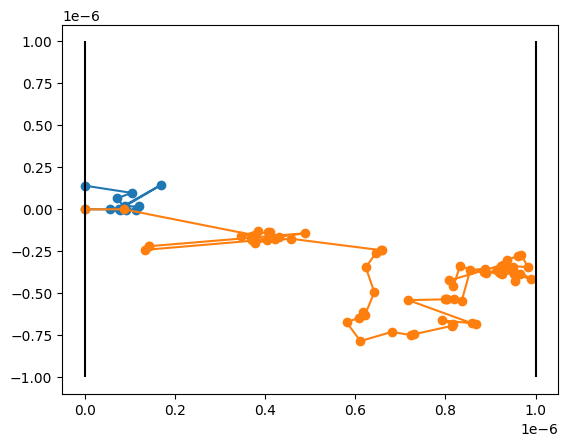

In [4]:
mc.PlotRayPath(ray1)
mc.PlotRayPath(ray2)
mc.PlotMaterial(mat,scale = 1, ax=plt)

### Trial Small

In [46]:
mat = mc.Material(1.5+ 0.0000023*1j, 0.0000002, 10E-7)

raySmall = mc.MonteCarloTrial(10, mat, 0.5, mc.KVector(0,0), debug = False)

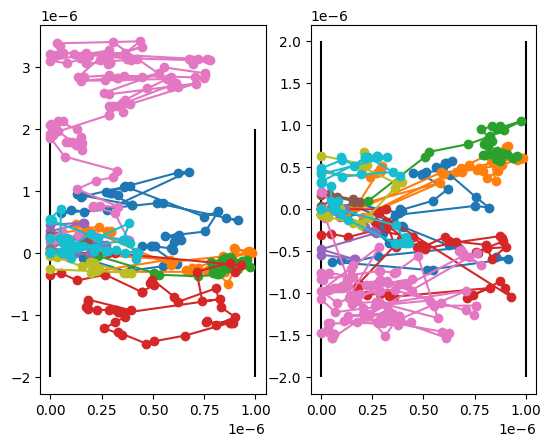

In [47]:
fig, ax = plt.subplots(1,2)

mc.PlotMaterial(mat,scale = 2, ax=ax[0])
for ray in raySmall :
    mc.PlotRayPath(ray, slice = 1, ax=ax[0])    

mc.PlotMaterial(mat,scale = 2, ax=ax[1])
for ray in raySmall :
    mc.PlotRayPath(ray, slice = 0, ax=ax[1])    

In [41]:
## reflect

kk = mc.normalize([0,.1,-1])
k = mc.Refract3D(1.5, 1 , np.array([0,0,-1]), kk )
live = mc.TIRCheck(1.5,1.0,np.array([0,0,-1]),kk)

print("TIR?",live,kk,k)

TIR? False [ 0.          0.09950372 -0.99503719] [-0.          0.14925558 -0.98879865]


###  Trial Large

In [48]:
rays = mc.MonteCarloTrial(1000, mat, 0.5, mc.KVector(0,0), debug = False)

#### bin by angle

(array([ 36.,  42.,  70.,  85., 103.,  94.,  94.,  68.,  48.,  20.,   0.,
          0.,   4.,   0.,   6.,   4.,   9.,   3.,   2.,  12.]),
 array([2.85693000e-03, 1.59793716e-01, 3.16730502e-01, 4.73667289e-01,
        6.30604075e-01, 7.87540861e-01, 9.44477647e-01, 1.10141443e+00,
        1.25835122e+00, 1.41528801e+00, 1.57222479e+00, 1.72916158e+00,
        1.88609836e+00, 2.04303515e+00, 2.19997194e+00, 2.35690872e+00,
        2.51384551e+00, 2.67078230e+00, 2.82771908e+00, 2.98465587e+00,
        3.14159265e+00]),
 <BarContainer object of 20 artists>)

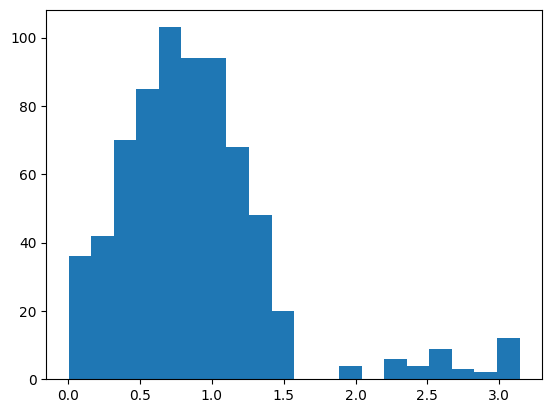

In [49]:
[binRef,binTrans ] = mc.BinRaysAngle(rays)

plt.hist(binRef,20)

(array([ 8., 17., 27., 28., 35., 41., 39., 38., 27., 11.,  5.,  2.,  6.,
         4.,  2.,  3.,  3.,  2.,  1.,  1.]),
 array([0.06563204, 0.20516397, 0.3446959 , 0.48422783, 0.62375976,
        0.76329169, 0.90282362, 1.04235555, 1.18188747, 1.3214194 ,
        1.46095133, 1.60048326, 1.74001519, 1.87954712, 2.01907905,
        2.15861098, 2.29814291, 2.43767483, 2.57720676, 2.71673869,
        2.85627062]),
 <BarContainer object of 20 artists>)

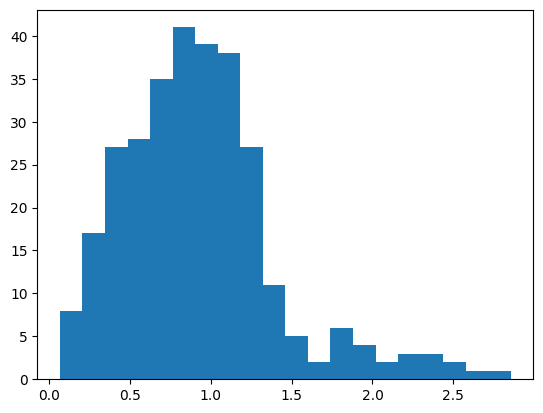

In [50]:
plt.hist(binTrans,20)

#### Bin By Position

(array([298., 101.,  73.,  58.,  33.,  30.,  39.,  17.,  18.,   8.,   7.,
          2.,   4.,   4.,   0.,   2.,   2.,   2.,   1.,   1.]),
 array([1.43884765e-12, 1.64626663e-07, 3.29251888e-07, 4.93877112e-07,
        6.58502337e-07, 8.23127561e-07, 9.87752786e-07, 1.15237801e-06,
        1.31700323e-06, 1.48162846e-06, 1.64625368e-06, 1.81087891e-06,
        1.97550413e-06, 2.14012936e-06, 2.30475458e-06, 2.46937981e-06,
        2.63400503e-06, 2.79863025e-06, 2.96325548e-06, 3.12788070e-06,
        3.29250593e-06]),
 <BarContainer object of 20 artists>)

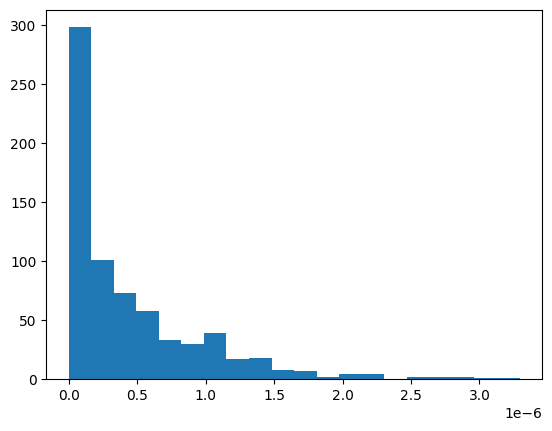

In [51]:
[binRef,binTrans ] = mc.BinRaysPosition(rays)

plt.hist(binRef,20)

(array([20., 16., 21., 41., 70., 54., 19., 22., 10., 11.,  2.,  6.,  3.,
         2.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([1.83588200e-09, 1.93029294e-07, 3.84222705e-07, 5.75416117e-07,
        7.66609528e-07, 9.57802940e-07, 1.14899635e-06, 1.34018976e-06,
        1.53138317e-06, 1.72257659e-06, 1.91377000e-06, 2.10496341e-06,
        2.29615682e-06, 2.48735023e-06, 2.67854364e-06, 2.86973706e-06,
        3.06093047e-06, 3.25212388e-06, 3.44331729e-06, 3.63451070e-06,
        3.82570411e-06]),
 <BarContainer object of 20 artists>)

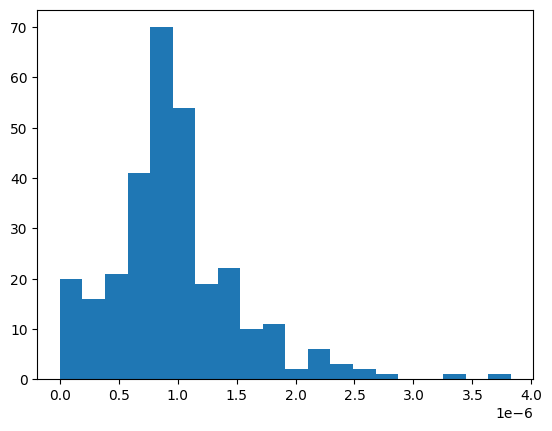

In [52]:
plt.hist(binTrans,20)

### Jones 

In [33]:
air = OpticalFunction(1.0)
glass = OpticalFunction(1.5)

stack = FilmStack()
# Return a Jones matrix
r = stack.reflectionCoefficient(60*deg, wavelength, air, glass)
r

[[(-0.42020410288672866+0j), 0j], [0j, (-0.04244923464074502+0j)]]